In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [4]:
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [5]:
df.tail()

User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

In [8]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [9]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

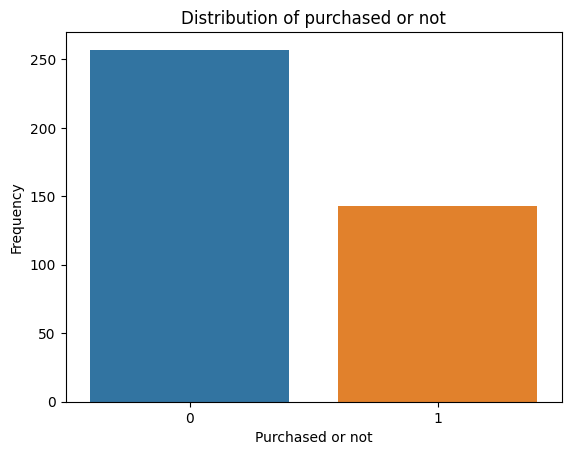

In [39]:
sns.countplot(df['Purchased'])
plt.title('Distribution of purchased or not')
plt.xlabel('Purchased or not')
plt.ylabel('Frequency')
plt.show()

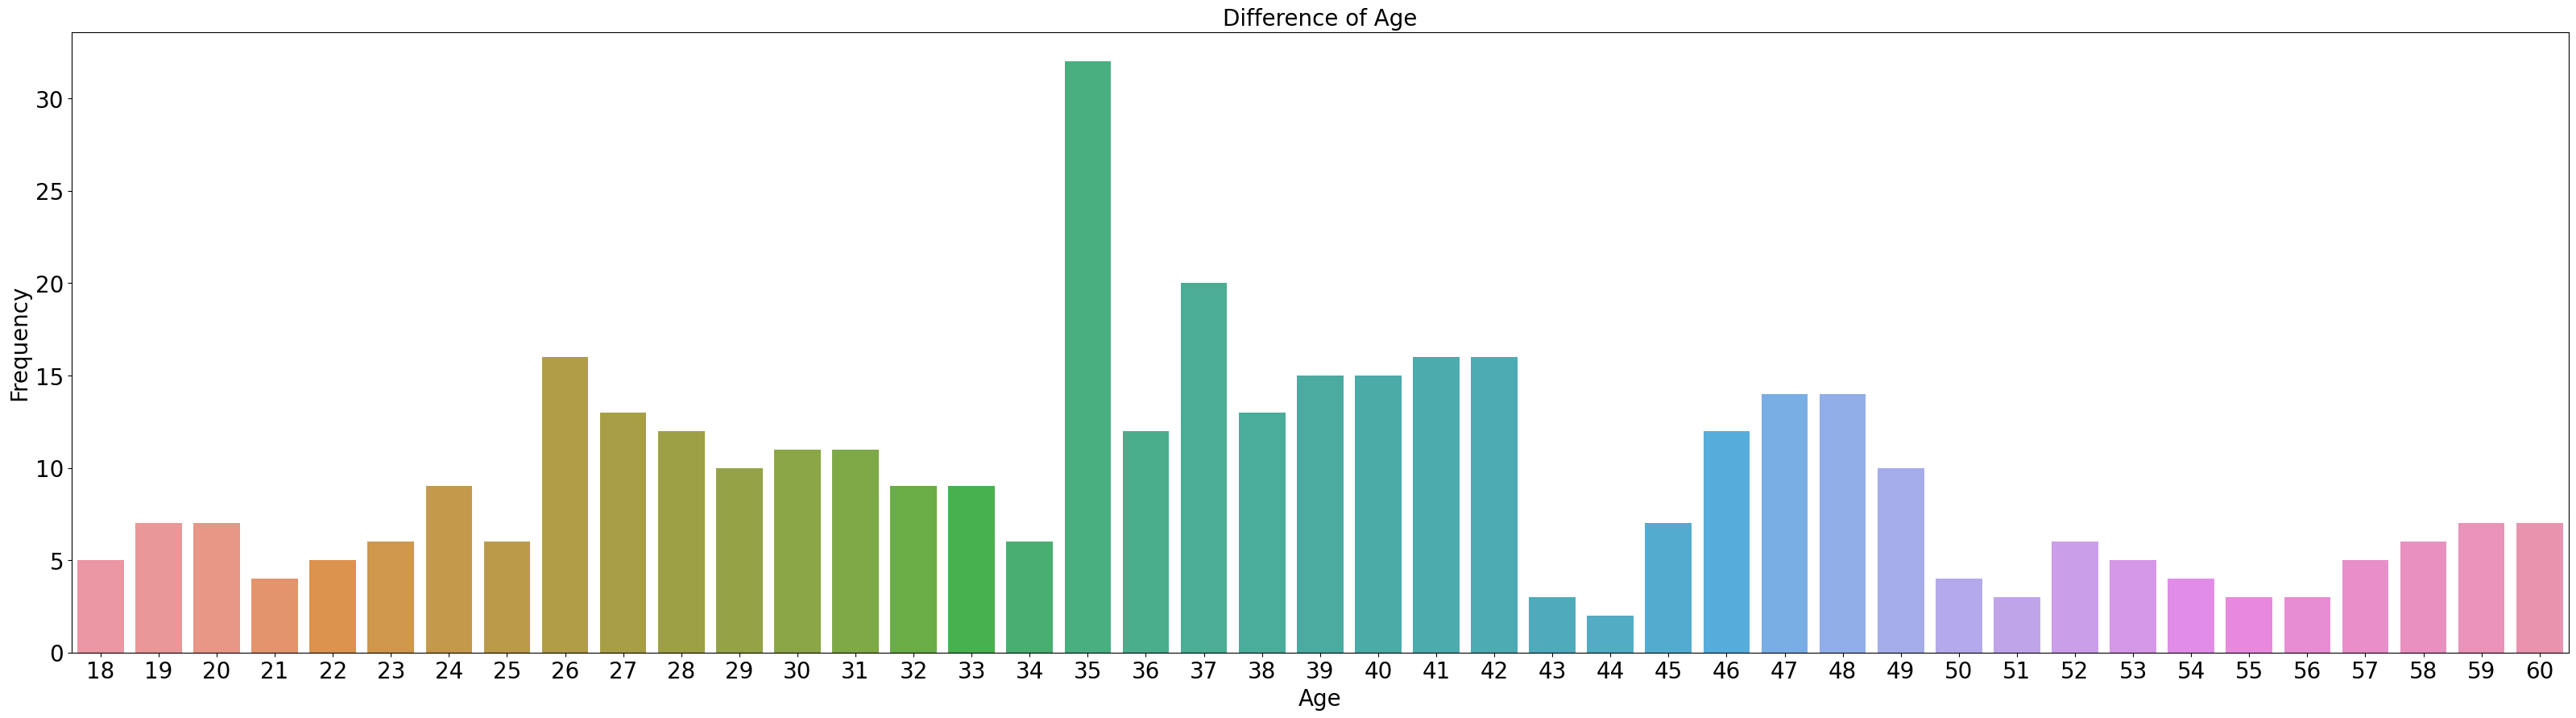

In [49]:
plt.figure(figsize= (40,10))
sns.countplot(df['Age'])
plt.title('Difference of Age',fontsize = 20)
plt.xlabel('Age',fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.yticks(size=20)
plt.xticks(size=20)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

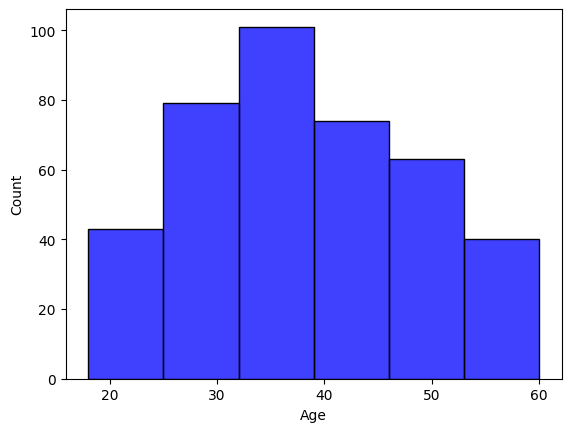

In [58]:
sns.histplot(data = df,x='Age',color = 'blue',bins = 6)

In [66]:
X = df.iloc[:,[2,3]].values
print(X)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [62]:
Y = df.iloc[:,4]
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20,random_state = 45)


(320, 2)
(80, 2)
(320,)
(80,)


In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [75]:
y_pred = model.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [77]:
accuracy = accuracy_score(Y_test,y_pred)
accuracy

0.8375

In [81]:
confusion = confusion_matrix(Y_test,y_pred)
print(confusion)

[[45  3]
 [10 22]]


In [84]:
tp = confusion[0][0]
tn = confusion[1][1]
fp = confusion[1][0]
fn = confusion[0][1]
total = tp+tn+fp+fn
error_rate = (fp+fn)/total
print(error_rate)
accuracy = 1-error_rate
print(accuracy)

0.1625
0.8375


In [85]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        48
           1       0.88      0.69      0.77        32

    accuracy                           0.84        80
   macro avg       0.85      0.81      0.82        80
weighted avg       0.84      0.84      0.83        80



In [ ]:
#Precision — What percent of your predictions were correct? tp / (tp + fp)
#Recall — What percent of the positive cases did you catch? tp / (tp + fn)
#F1 score — What percent of positive predictions were correct? 2*(precision+recall)/(precision+recall)
#Support is the number of actual occurrences of the class in the specified dataset. 

<Axes: >

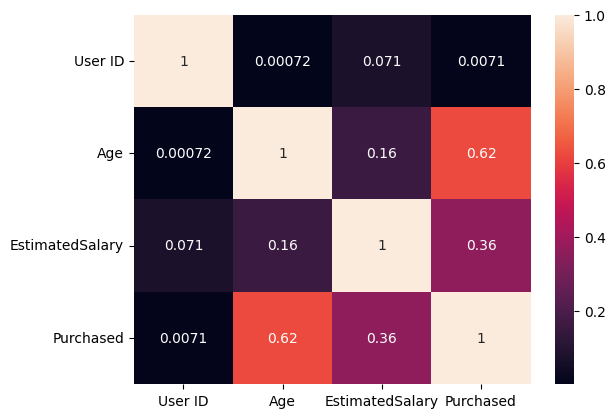

In [88]:
sns.heatmap(df.corr().abs(),annot = True)

<Axes: xlabel='Age', ylabel='Density'>

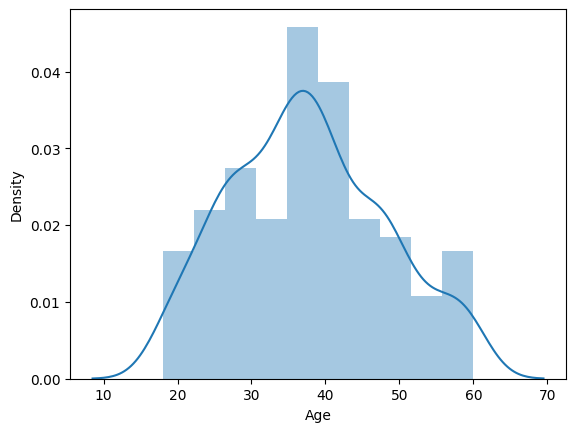

In [89]:
sns.distplot(df['Age'])